# PCA Agorithmn:-
PCA (Principal Component Analysis) is a dimensionality reduction technique used in data analysis and machine learning. It helps you to reduce the number of features in a dataset while keeping the most important information. It changes your original features into new features these new features don’t overlap with each other and the first few keep most of the important differences found in the original data.

PCA is commonly used for data preprocessing for use with machine learning algorithms. It helps to remove redundancy, improve computational efficiency and make data easier to visualize and analyze especially when dealing with high-dimensional data.

In [13]:
#  PCA from Scratch
# ==================================================================================================================================================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SklearnPCA

# =============================================================================================================================================================================================

In [14]:
# 1️⃣ Load Dataset(Kaggle)
# ============================================================================================================================================================================

# Here,We take the Mall Customers dataset
data = pd.read_csv(r"C:\Users\ASUS\Desktop\cleaned_DataAnalysis\archive (11).zip")
data.head()
# ============================================================================================================================================================================

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
# We'll use two correlated features for clarity
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# =============================
# 2️⃣ Standardize Data
# ============================================================================================================================================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================================================================================================================================================

In [16]:
# 3️⃣ Compute Covariance Matrix
# ============================================================================================================================================================================
cov_matrix = np.cov(X_scaled.T)
print("Covariance Matrix:\n", cov_matrix)

# ============================================================================================================================================================================

Covariance Matrix:
 [[1.00502513 0.00995261]
 [0.00995261 1.00502513]]


In [17]:
# 4️⃣ Compute Eigenvalues and Eigenvectors
# ============================================================================================================================================================================
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_idx]
eigen_vectors = eigen_vectors[:, sorted_idx]

print("\nEigenvalues:\n", eigen_values)
print("\nEigenvectors:\n", eigen_vectors)

# ============================================================================================================================================================================


Eigenvalues:
 [1.01497774 0.99507251]

Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [18]:
# 5️⃣ Explained Variance
# ============================================================================================================================================================================
explained_variance_ratio = eigen_values / np.sum(eigen_values)
print("\nExplained Variance Ratio:\n", explained_variance_ratio)
# ============================================================================================================================================================================


Explained Variance Ratio:
 [0.50495142 0.49504858]


In [19]:
# 6️⃣ Project Data onto Principal Components
# ============================================================================================================================================================================
# Choose top k=2 components (here we only have 2)
W = eigen_vectors[:, :2]
X_pca = np.dot(X_scaled, W)

# ============================================================================================================================================================================

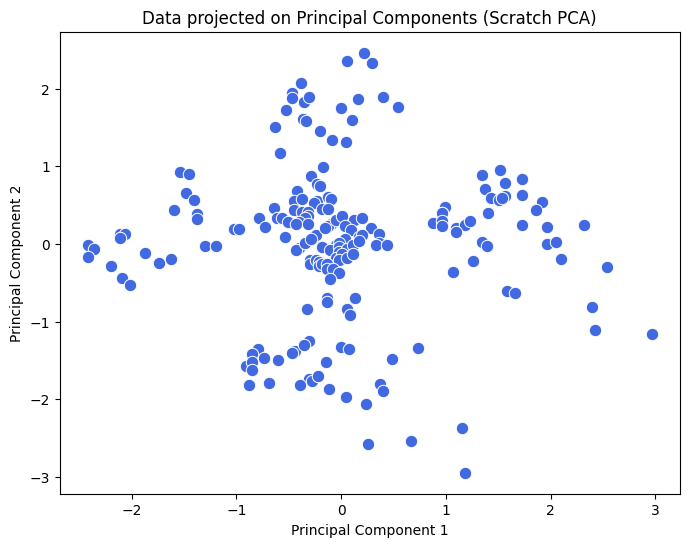

In [20]:
# 7️⃣ Visualization of PCA Projection
# ============================================================================================================================================================================
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], s=80, color='royalblue')
plt.title("Data projected on Principal Components (Scratch PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# ============================================================================================================================================================================

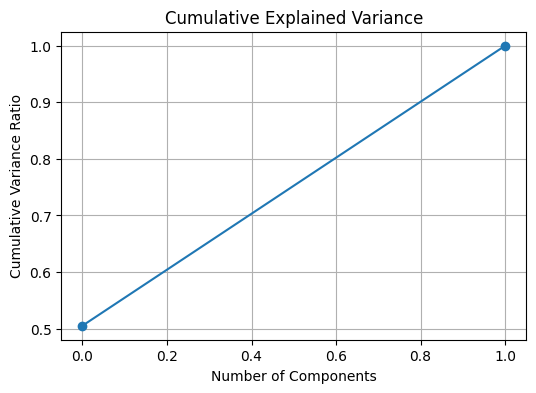

In [21]:
# 8️⃣ Explained Variance Plot
# ============================================================================================================================================================================
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid(True)
plt.show()

# ============================================================================================================================================================================

In [22]:
# 9️⃣ Compararision with sklearn PCA
# ============================================================================================================================================================================
pca_sklearn = SklearnPCA(n_components=2)
X_sklearn_pca = pca_sklearn.fit_transform(X_scaled)

print("\nSklearn PCA explained variance ratio:\n", pca_sklearn.explained_variance_ratio_)
# ============================= ============================= ============================= ============================= ============================= =============================


Sklearn PCA explained variance ratio:
 [0.50495142 0.49504858]


In [23]:
# Conclusions:-
# hence,We successfuly implemented PCA Algorithm on "Mall Customer Dataset" and visualised the projection of 2-D data-points into 1-D.
# PCA is basically a preprocessing machine learning technique used to convert the high dimensional data-set into lower-dimensional dataset.
# It works on the basic concepts of Eigen-values,Eigen-vectors,Covariance and varinace of the data-points.
# Many features is reduced to------------------->lesser features(without losing the important informations)---------------->called Principal Components.
# It reduces redundacy,make the model more robust,computationally fast and efficient and finally increases the accuracy.

#Disadvantages of Principal Component Analysis:-
#Interpretation Challenges: The new components are combinations of original variables which can be hard to explain.
#Data Scaling Sensitivity: Requires proper scaling of data before application or results may be misleading.
#Information Loss: Reducing dimensions may lose some important information if too few components are kept.
#Assumption of Linearity: Works best when relationships between variables are linear and may struggle with non-linear data.
#Computational Complexity: Can be slow and resource-intensive on very large datasets.